# Data Cleaning Notebook
This notebook will read in the raw data from the sensors, clean it, establish a common timestep, merge and interpolate data into a common frame, then create columns of additional information or metrics. Subsets of that final dataset for each transect will also be made.

Many of these operations were explored in the Raw Data Parsing notebook found in this repository.

CSV files will be saved of each cleaned data set with common timestamp, a merged data set, and transect specific datasets.

## Loading Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
% matplotlib inline
import seaborn as sns
from IPython.display import display
import sensor_cleaning as sc

#Raw Data
CTD_filename = './CTD/data.txt'
GGA_filename= './GGA/gga_2017-07-12_f0001.txt'
Op1_filename='./Optode/optode_20170712144117.txt'
Op2_filename='./Optode/optode_20170712155518.txt'
Op3_filename='./Optode/optode_20170712194058.txt'
AirMar1_filename='./Weather_Station/airmar1.txt'
AirMar2_filename='./Weather_Station/airmar2.txt'
AirMar3_filename='./Weather_Station/airmar4.txt'
DGE_filename= './DGE/dge_170712_wareham_jetyak_deployment.dat'
Nitrate1_filename = './Nitrate/A0066322.CSV'
Nitrate2_filename= './Nitrate/A0066323.CSV'
Nitrate3_filename= './Nitrate/A0066324.CSV'

# PANDAS dataframe display options
pd.set_option('display.max_columns', None)

# more info at http://matplotlib.org/users/customizing.html
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16

/home/vpreston/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/vpreston/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# in the event that this file is changed on disk, simply reload it using this line
reload(sc)

<module 'sensor_cleaning' from 'sensor_cleaning.pyc'>

## Reading and Cleaning Data from Individual Instruments

In [3]:
# Read and clean the CTD information
ctd = pd.read_table(CTD_filename, delimiter=',', header=0)
ctd = sc.clean_ctd(ctd)

# Based on observations of the data made, grab only information within a relevant timeframe
ctd = ctd.drop(ctd[ctd.Julian_Date > (1.275 + 2457946)].index)
ctd = ctd.drop(ctd[ctd.Julian_Date < (1.117 + 2457946)].index)

# plt.plot(ctd['Julian_Date'], ctd['Temperature'])

ctd.head(2)

,Time,Conductivity,Temperature,Pressure,Sea pressure,Depth,Salinity,Specific conductivity,Density anomaly,Speed of sound,Year,Month,Day,Hour,Minute,Second,Julian_Date,Seconds_Elapsed
25697,2017-07-12 14:48:28.833,2.417025,24.528479,10.240866,0.108366,0.107483,1.253660,2438.990953,-1.885722,1496.841315,2017,7,12,14.0,48.0,28.833,2.457947e+06,1090108.833
25698,2017-07-12 14:48:29.000,2.416661,24.529848,10.245403,0.112903,0.111982,1.253423,2438.558573,-1.886228,1496.844825,2017,7,12,14.0,48.0,29.000,2.457947e+06,1090109.000


,Time,Year,Month,Day,Hour,Minute,Second,Seconds_Elapsed,Julian_Date,CH4_ppm,CO2_ppm,CH4_ppm_adjusted,CO2_ppm_adjusted
3491,07/12/2017 14:48:29.085,2017,7,12,14.0,48.0,29.085,1090109.085,2.457947e+06,55.0548,6105.91,83.451086,1785.562019
3492,07/12/2017 14:48:30.062,2017,7,12,14.0,48.0,30.062,1090110.062,2.457947e+06,55.1099,6103.26,83.537036,1784.787074


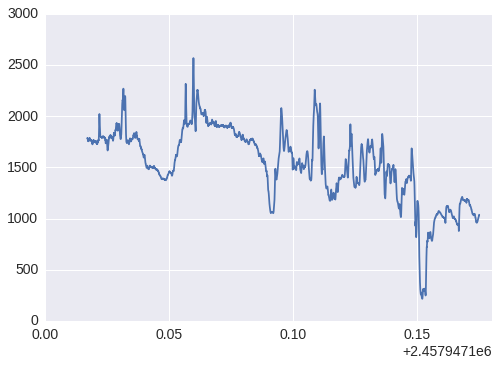

In [4]:
# Read and clean the GGA information
gga = pd.read_table(GGA_filename, delimiter=', ', header=1, engine='python')
gga = sc.clean_gga(gga)

# Only keep the columns with useful information
gga = gga.loc[:,['Time',
                 'Year',
                 'Month',
                 'Day',
                 'Hour',
                 'Minute',
                 'Second',
                 'Seconds_Elapsed',
                 'Julian_Date',
                 'CH4_ppm',
                 'CO2_ppm',
                 'CH4_ppm_adjusted',
                 'CO2_ppm_adjusted']]

# plt.plot(gga['Julian_Date'], gga['CO2_ppm_adjusted'])

gga = gga.drop(gga[gga.Julian_Date > (1.275 + 2457946)].index)
gga = gga.drop(gga[gga.Julian_Date < (1.117 + 2457946)].index)

plt.plot(gga['Julian_Date'], gga['CO2_ppm_adjusted'])

gga.head(2)

In [5]:
# Read and clean the optode information
op = pd.read_table(Op1_filename, delimiter=',', header=0, engine='python')
temp_op1 = pd.read_table(Op2_filename, delimiter=',', header=0, engine='python')
temp_op2 = pd.read_table(Op3_filename, delimiter=',', header=0, engine='python')
op = op.append(temp_op1, ignore_index=True)
op = op.append(temp_op2, ignore_index=True)

op = sc.clean_optode(op)

op = op.drop(op[op.Julian_Date > (1.275 + 2457946)].index)
op = op.drop(op[op.Julian_Date < (1.125 + 2457946)].index)

# plt.plot(op['O2Concentration'], op['Temperature'])

op = op.drop(op[(op.Julian_Date  > (1.2417 + 2457946)) & (op.Julian_Date < (1.2420 + 2457946))].index)
# op_trial = op_trial.drop(op_trial[op_trial.Julian_Date < (1.2420 + 2457946)].index)

# plt.plot(op_trial['O2Concentration'], op_trial['Temperature'])

op.head(2)

,posixtime,model,SN,O2Concentration,AirSaturation,Temperature,CalPhase,TCPhase,C1RPh,C2RPh,C1Amp,C2Amp,RawTemp,Julian_Date
817,1.499875e+09,4831,277,146.9122,56.86212,24.90939,36.40923,36.40923,45.06316,8.653923,734.7151,710.5728,45.48639,2.457947e+06
818,1.499875e+09,4831,277,146.6408,56.74984,24.90251,36.43424,36.43424,45.08876,8.654518,735.4789,711.1578,45.70924,2.457947e+06


In [6]:
# Read and clean the airmar weather station information
airmar = pd.read_table(AirMar1_filename, delimiter=',', header=0)
temp = pd.read_table(AirMar2_filename, delimiter=',', header=0)
temp2 = pd.read_table(AirMar3_filename, delimiter=',', header=0)
airmar = airmar.append(temp, ignore_index=True)
airmar = airmar.append(temp2, ignore_index=True)

# Keep only certain columns from the weather station
airmar = sc.clean_airmar(airmar)
airmar = airmar.loc[:,['lat',
                       'lon',
                       'lat_mod',
                       'lon_mod',
                       'distance',
                       'side',
                       'in_range',
                       'Julian_Date',
                       'Year',
                       'Month',
                       'Day',
                       'Hour',
                       'Minute',
                       'Second',
                       'Seconds_Elapsed',
                       'COG_T',
                       'SOG_K',
                       'pressure_B',
                       'wind_dir_T',
                       'wind_speed_M',
                       'rateofturn']]

airmar = airmar.drop(airmar[airmar.Julian_Date > (1.275 + 2457946)].index)
airmar = airmar.drop(airmar[airmar.Julian_Date < (1.125 + 2457946)].index)

airmar.head(2)

/home/vpreston/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/vpreston/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,lat,lon,lat_mod,lon_mod,distance,side,in_range,Julian_Date,Year,Month,Day,Hour,Minute,Second,Seconds_Elapsed,COG_T,SOG_K,pressure_B,wind_dir_T,wind_speed_M,rateofturn
3047,4145.4858,7041.0774,41.758097,-70.684623,-44.417621,1.0,1.0,2.457947e+06,2017,7,12,15.0,0.0,0.1,1090800.1,7.3,5.1,1.0149,113.2,1.9,0.0
3048,4145.4868,7041.0774,41.758113,-70.684623,-44.681445,1.0,1.0,2.457947e+06,2017,7,12,15.0,0.0,1.1,1090801.1,8.8,5.5,1.0150,107.9,2.0,0.0


In [7]:
# Read and clean the DGE information
dge = pd.read_table(DGE_filename, delimiter=',', header=1)

dge = sc.clean_dgeu(dge)

#strip away old data
dge = dge.drop(dge[dge.Julian_Date > (1.275 + 2457946)].index)
dge = dge.drop(dge[dge.Julian_Date < (1.117 + 2457946)].index)

#keep only certain columns
dge = dge.loc[:,['Julian_Date',
                 'SweepGas_Press_Avg',
                 'Year',
                 'Month',
                 'Day',
                 'Hour',
                 'Minute',
                 'Second',
                 'Seconds_Elapsed']]

dge.head(2)

/home/vpreston/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Julian_Date,SweepGas_Press_Avg,Year,Month,Day,Hour,Minute,Second,Seconds_Elapsed
59352,2.457947e+06,2360,2017,7,12,14.0,48.0,29.0,1090109.0
59353,2.457947e+06,2358,2017,7,12,14.0,48.0,30.0,1090110.0


In [8]:
# Read and clean the nitrate information
nitrate = pd.read_table(Nitrate1_filename, delimiter=',', header=14)
temp1 = pd.read_table(Nitrate2_filename, delimiter=',', header=14)
temp2 = pd.read_table(Nitrate3_filename, delimiter=',', header=14)
nitrate = nitrate.append(temp1, ignore_index=True)
nitrate = nitrate.append(temp2, ignore_index=True)

nitrate = sc.clean_nitrate(nitrate)

#keep only certain columns
nitrate = nitrate.loc[:,['Julian_Date',
                         '0.00',
                         'Year',
                         'Month',
                         'Day',
                         'Hour',
                         'Minute',
                         'Second',
                         'Seconds_Elapsed']]

#strip away old or bad data
nitrate = nitrate.drop(nitrate[nitrate.Julian_Date > (1.275 + 2457946)].index)
nitrate = nitrate.drop(nitrate[nitrate.Julian_Date < (1.117 + 2457946)].index)
nitrate = nitrate.drop(nitrate[nitrate['0.00'] < 0].index)

nitrate.head(2)

,Julian_Date,0.00,Year,Month,Day,Hour,Minute,Second,Seconds_Elapsed
40494,2.457947e+06,16.28,2017,7,12,14,48,33.9516,1.090114e+06
40505,2.457947e+06,16.31,2017,7,12,14,48,50.7348,1.090131e+06


In [9]:
#***********************************
#Only run this cell if new CSVs need to be generated!
#***********************************

# Write these tables into CSVs
ctd.to_csv('./Cleaned_Data/ctd.csv', sep=',')
gga.to_csv('./Cleaned_Data/gga.csv', sep=',')
op.to_csv('./Cleaned_Data/op.csv', sep=',')
airmar.to_csv('./Cleaned_Data/airmar.csv', sep=',')
dge.to_csv('./Cleaned_Data/dge.csv', sep=',')
nitrate.to_csv('./Cleaned_Data/nitrate.csv', sep=',')

## Combining Instruments through Interpolation

In [10]:
#Create dataframes which are indexed by the common timestamp, which in this case is Julian Date
ctd_jd = ctd.set_index('Julian_Date')
gga_jd = gga.set_index('Julian_Date')
op_jd = op.set_index('Julian_Date')
airmar_jd = airmar.drop_duplicates(subset='Julian_Date', keep='last').set_index('Julian_Date') #airmar has bad data
dge_jd = dge.set_index('Julian_Date')
nitrate_jd = nitrate.set_index('Julian_Date')

In [11]:
#Combine all of the dataframes together
temp= pd.concat([ctd_jd, gga_jd, op_jd, dge_jd, nitrate_jd, airmar_jd], 
                axis=1, 
                keys=['ctd', 'gga', 'op', 'dge', 'nitrate', 'airmar'])

#Interpolate information
inter_temp = temp.interpolate()

#Resample the data frame to the index of the CTD instrument
ctd_index = ctd_jd.index
complete_data = inter_temp.loc[ctd_index]


In [12]:
#***********************************
#Only run this cell if new CSV needs to be generated!
#***********************************

# Write these tables into CSVs
complete_data.to_csv('./Cleaned_Data/interpolated_complete_data.csv', sep=',')

## Seperating out Transects
Through observing the data, the following 6 transects were identified (in Julian Date).

It is important to note the following:
- Transect A and Transect F include start-up and shut-down of the vehicle, which means some of the data may be erroneous. Transect F is particularly incomplete, and may simply be ignored in making future claims.
- Transect A: Covers from plume to the "bridge" on the wide part of the river. A back and forth transect across the river flow was done.
- Transect B: Covers the full river
- Transect C: Covers the full river
- Transect D: Covers from plume to the "house" on the small, serpentine part of the river
- Transect E: Covers the slow tranverse to the "bridge", so is not a straightforward up and back transect, but rather circles around several areas over time
- Transect F: Appears to contain disrupted/corrupted information, but theoretically covers from "bridge" to plume.

In [13]:
transect_A = complete_data[complete_data.index <= 2457947.1471]
transect_B = complete_data[(complete_data.index <= 2457947.19) & (complete_data.index > 2457947.1471)]
transect_C = complete_data[(complete_data.index <= 2457947.2015) & (complete_data.index > 2457947.19)]
transect_D = complete_data[(complete_data.index <= 2457947.2157) & (complete_data.index > 2457947.2015)]
transect_E = complete_data[(complete_data.index <= 2457947.2655) & (complete_data.index > 2457947.2157)]
# transect_F = complete_data[complete_data.index > 2457947.2655]

In [14]:
#***********************************
#Only run this cell if new CSVs need to be generated!
#***********************************

# Write these tables into CSVs
transect_A.to_csv('./Cleaned_Data/transectA.csv', sep=',')
transect_B.to_csv('./Cleaned_Data/transectB.csv', sep=',')
transect_C.to_csv('./Cleaned_Data/transectC.csv', sep=',')
transect_D.to_csv('./Cleaned_Data/transectD.csv', sep=',')
transect_E.to_csv('./Cleaned_Data/transectE.csv', sep=',')
# transect_F.to_csv('./Cleaned_Data/transectF.csv', sep=',')